# Criando modelo de classificação com Naive Bayes

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [2]:
dataset = pd.read_csv('insurance.csv')

In [3]:
dataset

,Unnamed: 0,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,2,False,Senior,Prole,Cautious,Current,NaN,Football,NaN,Economy,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,3,False,Senior,UpperMiddle,Psychopath,Current,NaN,Football,NaN,FamilySedan,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,4,False,Adolescent,Middle,Normal,Older,NaN,EggShell,NaN,Economy,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,5,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,19997,False,Adult,Middle,Normal,Older,NaN,Tank,NaN,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,19998,False,Senior,UpperMiddle,Normal,Current,NaN,Football,NaN,Luxury,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,19999,False,Adult,Middle,Normal,Older,NaN,Football,NaN,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


### Limpando dados e separando as variáveis

In [ ]:
dataset = dataset.drop(columns=['Unnamed: 0'])

In [7]:
dataset

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,NaN,Football,NaN,Economy,Normal,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,NaN,Football,NaN,FamilySedan,Excellent,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,NaN,EggShell,NaN,Economy,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,Poor,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,False,Adult,Middle,Normal,Older,NaN,Tank,NaN,FamilySedan,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,False,Senior,UpperMiddle,Normal,Current,NaN,Football,NaN,Luxury,Excellent,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,False,Adult,Middle,Normal,Older,NaN,Football,NaN,FamilySedan,Excellent,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


Separando as variavéis independentes da variável dependente. O objetivo é o 'Accident'.

In [8]:
y = dataset.iloc[:, 7].values # Classe (variável dependente)
X = dataset.iloc[:, [0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]].values # variáveis independentes

### Criando Label

In [16]:
labelEncoder = LabelEncoder()

Criando um looping para percorrer pelo comprimento (colunas (shape[1])) do objeto.

In [17]:
for i in range(X.shape[1]):
    if X[:, i].dtype == 'object':
        X[:, i] = labelEncoder.fit_transform(X[:,i])

In [18]:
# Dados foram transformados em números
X

array([[0, 1, 1, ..., 0, 3, 0],
       [0, 2, 1, ..., 1, 3, 2],
       [0, 2, 2, ..., 1, 3, 1],
       ...,
       [0, 2, 2, ..., 1, 3, 2],
       [0, 1, 0, ..., 1, 3, 2],
       [0, 1, 0, ..., 1, 3, 2]], dtype=object)

In [22]:
if y.dtype == 'object':
    labelEncoder_y = LabelEncoder()
    y = labelEncoder_y.fit_transform(y)

In [23]:
y

array([0, 3, 3, ..., 3, 3, 3])

### Dividindo os dados em Treino e Teste

- Recapitulando:
 - X independentes
 - y dependente

- Divisão dos dados de treino e teste
    - parametro teste_size é a proporção dos dados que serão destinados a teste
    - random_state é manter a variável aleatória

- Variáveis:
    - X_treinamento = 70% dos dados das variáveis independentes. X_teste = 20%.
    - y_treinamento = 70% da variável dependente. y_teste = 20%.

In [24]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.3, random_state=1)

## Criando o Modelo

Ao chamar o método `fit` em uma instância do modelo `GaussianNB` do Scikit-learn, o treinamento é realizado e o modelo é ajustado com base nos dados fornecidos.


In [25]:
modelo = GaussianNB()
modelo.fit(X_treinamento,y_treinamento)

GaussianNB()

O método `GaussianNB()` cria uma instância do modelo Naive Bayes Gaussiano, ainda não treinada.

O método `fit` ajusta o modelo aos dados fornecidos, aprendendo os parâmetros necessários para realizar classificações.

- X_treinamento: As características utilizadas no treinamento.
- y_treinamento: As classes correspondentes às características.

## Criando Previsões

In [26]:
# o modelo não precisa do y_teste para fazer a previsão
previsoes = modelo.predict(X_teste)

In [27]:
previsoes

array([3, 3, 3, ..., 3, 0, 3])

Previsões é na verdade o Y de X_teste. Ao calcular as métricas será necessário cruzar os valores de y_teste e previsoes.

### Calculando Métricas

Para medir a Acurácia, pega o que foi previsto e compara com y_teste.

In [28]:
# Calculando Acurácia
accuracy = accuracy_score(y_teste, previsoes)

In [29]:
accuracy

0.8361666666666666

No caso das outras métricas, deve-ser passar o parametro average com "Macro, Micro ou weighted"

- None e Micro, dão mais peso as classes mais frequentes.
- Macro e Weighted tratam as classes igualmente de acordo com a frequência.

In [33]:
precision = precision_score(y_teste, previsoes, average=None)

In [34]:
precision

array([0.67457627, 0.34980989, 1.        , 0.97525439])

In [39]:
# com peso
precision = precision_score(y_teste, previsoes, average='weighted')

In [40]:
precision

0.8984416515911416

In [35]:
recall = recall_score(y_teste, previsoes, average='weighted')

In [36]:
recall

0.8361666666666666

In [37]:
f1 = f1_score(y_teste, previsoes, average='weighted')

In [38]:
f1

0.8090758902175055

Valores das métricas:
- Acurácia: 0.8361666666666666
- Precisão: array([0.67457627, 0.34980989, 1.        , 0.97525439])
- Precisão com peso: 0.8984416515911416
- Recall: 0.8361666666666666
- F1 Score: 0.8090758902175055


- Acurácia (83,62%): proporção de classificações corretas em relação ao total de classificações. Representa o desempenho geral do modelo.

- Precisão (89%): Mede a proporção de instâncias verdadeiramente positivas entre as instãncias previstas como positivas.

- Recall (83,62%): mede a proporção de instâncias classificadas como positivas em relação as instâncias positivas reais.

- F1 Score (80,91%): harmonia entre precisão e recall. Um valor alto indica que o modelo tem bom equilíbrio entre falsos positivos e falsos negativos.

In [42]:
report = classification_report(y_teste, previsoes)

In [44]:
print(report)

              precision    recall  f1-score   support

           0       0.67      0.73      0.70       542
           1       0.35      0.73      0.47       505
           2       1.00      0.05      0.09       725
           3       0.98      1.00      0.99      4228

    accuracy                           0.84      6000
   macro avg       0.75      0.63      0.56      6000
weighted avg       0.90      0.84      0.81      6000



Report mostra os valores para cada uma das classes.

### Gerando Matriz de Confusão

Como são 4 classes, será uma matriz 4x4.

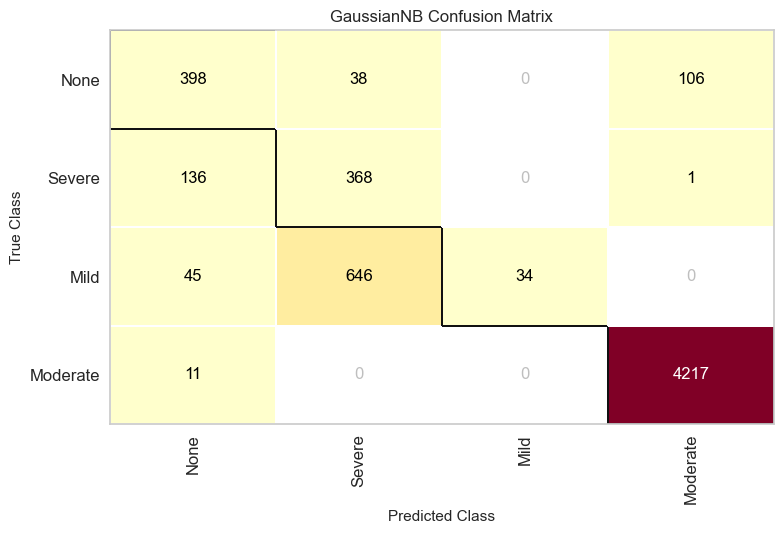

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [46]:
matriz_confusao = ConfusionMatrix(modelo, classes=['None', 'Severe', 'Mild', 'Moderate'])
matriz_confusao.fit(X_treinamento, y_treinamento)
matriz_confusao.score(X_teste, y_teste)
matriz_confusao.poof()